# Exploratory Data Analysis on Terrorism

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [47]:
data = pd.read_csv('/Users/pranjali_yadav/Desktop/GRIP/globalterrorismdb_0718dist.csv',encoding='latin1')

In [48]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [49]:
data.shape

(181691, 135)

In [50]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [51]:
data.info(1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [52]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [54]:
data.isnull().sum() # if there are any missing values in our dataset or not

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [55]:
data.dropna(axis=1,inplace=True)  #to remove the null value columns
data.drop('eventid',axis=1,inplace=True)

In [56]:
data.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   iyear            181691 non-null  int64 
 1   imonth           181691 non-null  int64 
 2   iday             181691 non-null  int64 
 3   extended         181691 non-null  int64 
 4   country          181691 non-null  int64 
 5   country_txt      181691 non-null  object
 6   region           181691 non-null  int64 
 7   region_txt       181691 non-null  object
 8   vicinity         181691 non-null  int64 
 9   crit1            181691 non-null  int64 
 10  crit2            181691 non-null  int64 
 11  crit3            181691 non-null  int64 
 12  success          181691 non-null  int64 
 13  suicide          181691 non-null  int64 
 14  attacktype1      181691 non-null  int64 
 15  attacktype1_txt  181691 non-null  object
 16  targtype1        181691 non-null  int64 
 17  targtype1_

In [58]:
print(data.shape)
data.describe()

(181691, 28)


,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,0.875668,...,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,0.329961,...,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#data.head(20)
#data.columns

In [60]:
#data.info()

<Axes: ylabel='country'>

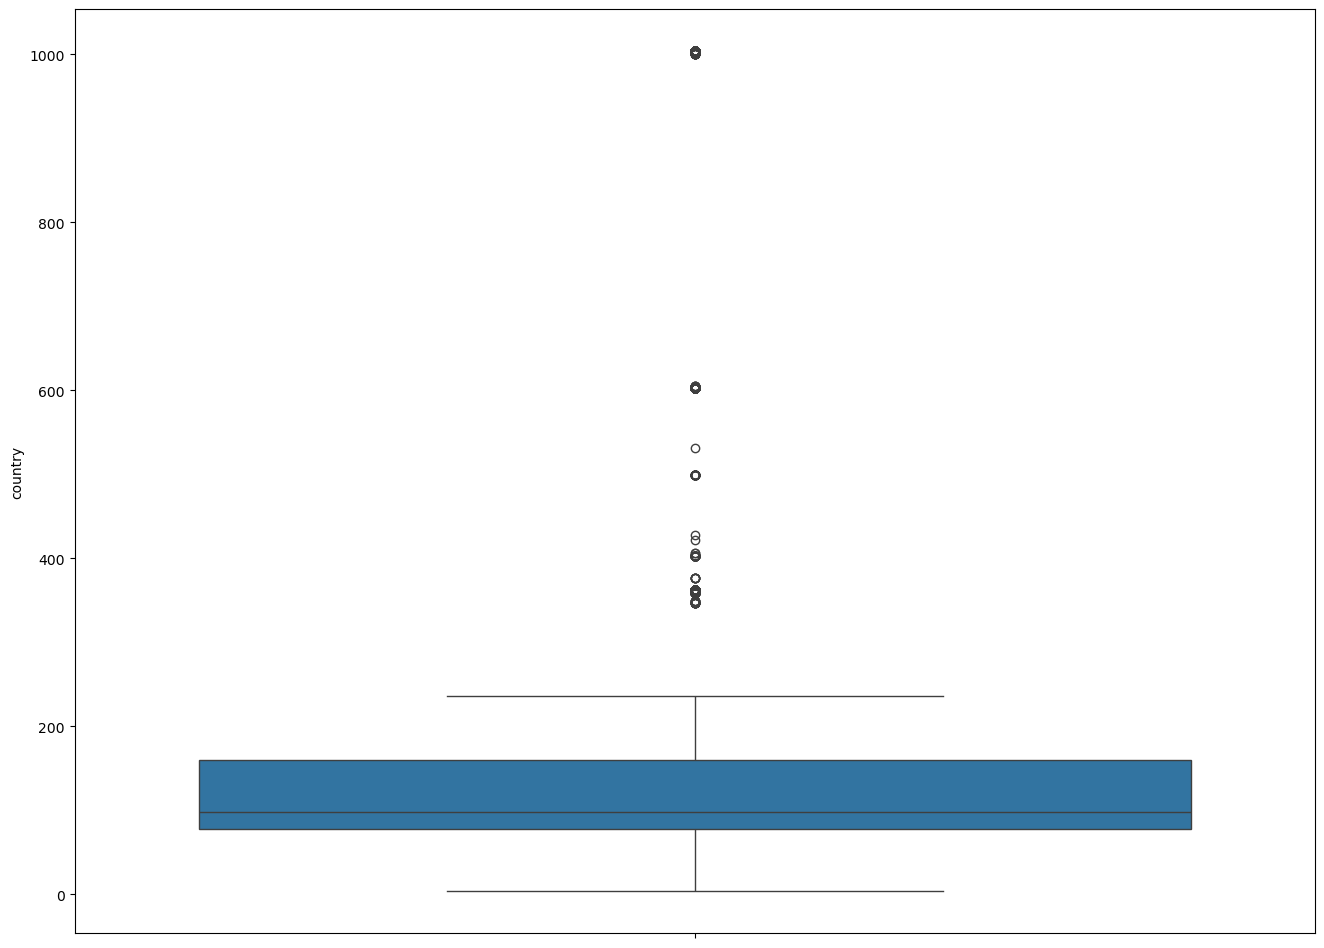

In [61]:
sns.boxplot(data['country'])

In [62]:
outlier_country=data[data['country']>300]
#outlier_country

In [63]:
data.drop(outlier_country.index,axis=0,inplace=True)

In [64]:
#data.tail(300)
data.shape

(175198, 28)

In [65]:
data=data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day'})
#data.head(20)

In [66]:
no_att=data[(data['month']==0) | (data['day']==0) | (data['year']==0)]
data.drop(no_att.index,axis=0,inplace=True)

In [67]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [68]:
data.drop(['year','month','day'],axis=1,inplace=True)
data.head()

,extended,country,country_txt,region,region_txt,vicinity,crit1,crit2,crit3,success,...,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,0,58,Dominican Republic,2,Central America & Caribbean,0,1,1,1,1,...,0,13,Unknown,0,PGIS,0,0,0,0,1970-07-02
5,0,217,United States,1,North America,0,1,1,1,1,...,0,5,Firearms,1,Hewitt Project,-9,-9,0,-9,1970-01-01
6,0,218,Uruguay,3,South America,0,1,1,1,0,...,0,5,Firearms,0,PGIS,0,0,0,0,1970-01-02
7,0,217,United States,1,North America,0,1,1,1,1,...,0,6,Explosives,1,Hewitt Project,-9,-9,0,-9,1970-01-02
8,0,217,United States,1,North America,0,1,1,1,1,...,0,8,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-02


In [69]:
data['region_txt'].value_counts() 

region_txt
Middle East & North Africa     50303
South Asia                     44866
South America                  18838
Sub-Saharan Africa             17093
Southeast Asia                 12427
Western Europe                 10705
Central America & Caribbean    10260
Eastern Europe                  4809
North America                   3416
East Asia                        790
Central Asia                     562
Australasia & Oceania            276
Name: count, dtype: int64

In [70]:
data['vicinity'].value_counts()

vicinity
 0    161752
 1     12560
-9        33
Name: count, dtype: int64

In [71]:
val=data[data['vicinity']==-9]
data.drop(val.index,axis=0,inplace=True)

In [72]:
data['extended'].value_counts()

extended
0    166245
1      8067
Name: count, dtype: int64

In [73]:
data['property'].value_counts()

property
 1    89629
 0    63513
-9    21170
Name: count, dtype: int64

In [74]:
data['INT_LOG'].value_counts()

INT_LOG
-9    89982
 0    78027
 1     6303
Name: count, dtype: int64

In [75]:
data['INT_IDEO'].value_counts()

INT_IDEO
-9    90104
 0    62107
 1    22101
Name: count, dtype: int64

In [76]:
data['INT_MISC'].value_counts()

INT_MISC
 0    159219
 1     14640
-9       453
Name: count, dtype: int64

In [77]:
data['INT_ANY'].value_counts()

INT_ANY
-9    83141
 0    60021
 1    31150
Name: count, dtype: int64

In [78]:
val=data[(data['INT_MISC'] == -9) | (data['INT_IDEO'] == -9) | (data['INT_LOG'] == -9) | (data['property'] == -9)]
data.drop(val.index,axis=0,inplace=True)

In [79]:
cols=['country','region','attacktype1','targtype1','weaptype1']
data.drop(cols,axis=1,inplace=True)
data.head()
#print(data.shape)

,extended,country_txt,region_txt,vicinity,crit1,crit2,crit3,success,suicide,attacktype1_txt,...,gname,individual,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,0,Dominican Republic,Central America & Caribbean,0,1,1,1,1,0,Assassination,...,MANO-D,0,Unknown,0,PGIS,0,0,0,0,1970-07-02
6,0,Uruguay,South America,0,1,1,1,0,0,Assassination,...,Tupamaros (Uruguay),0,Firearms,0,PGIS,0,0,0,0,1970-01-02
8,0,United States,North America,0,1,1,1,1,0,Facility/Infrastructure Attack,...,New Year's Gang,0,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-02
9,0,United States,North America,0,1,1,1,1,0,Facility/Infrastructure Attack,...,New Year's Gang,0,Incendiary,1,Hewitt Project,0,0,0,0,1970-01-03
10,0,United States,North America,0,1,1,0,0,0,Bombing/Explosion,...,"Weather Underground, Weathermen",0,Explosives,0,PGIS,0,0,0,0,1970-01-01


<Axes: xlabel='extended', ylabel='count'>

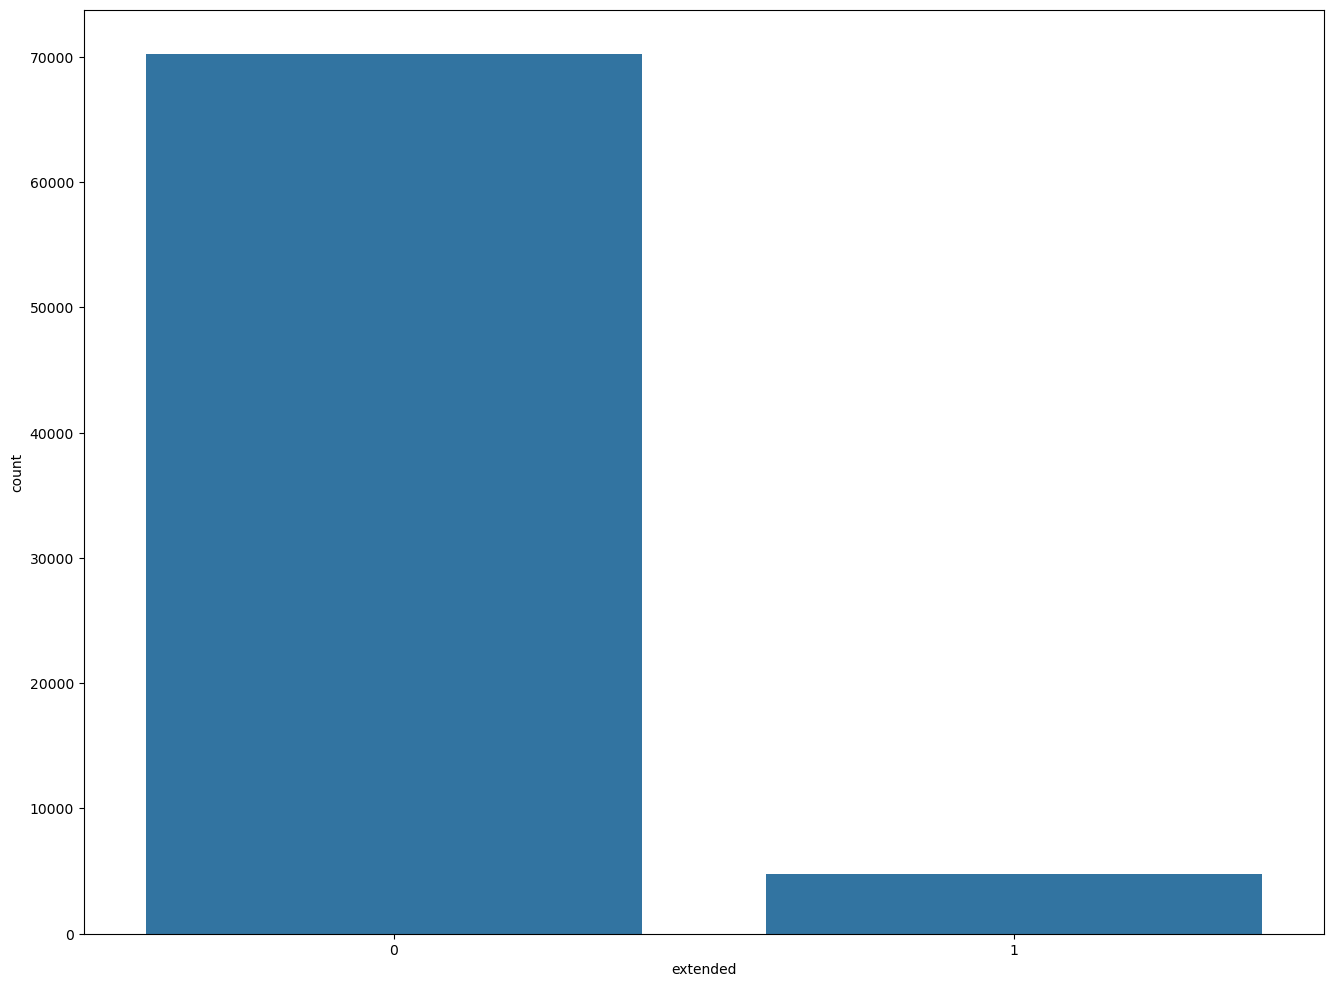

In [80]:
sns.countplot(x='extended',data=data)

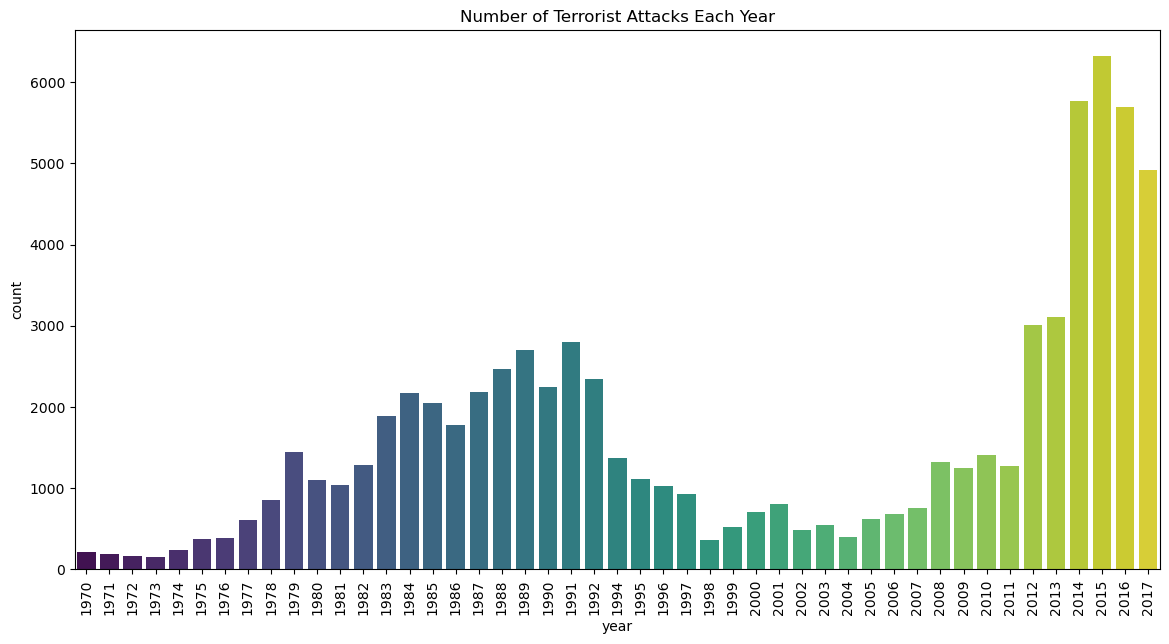

In [81]:
data['year'] = data['date'].dt.year
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=data, palette='viridis')
plt.title('Number of Terrorist Attacks Each Year')
plt.xticks(rotation=90)
plt.show()


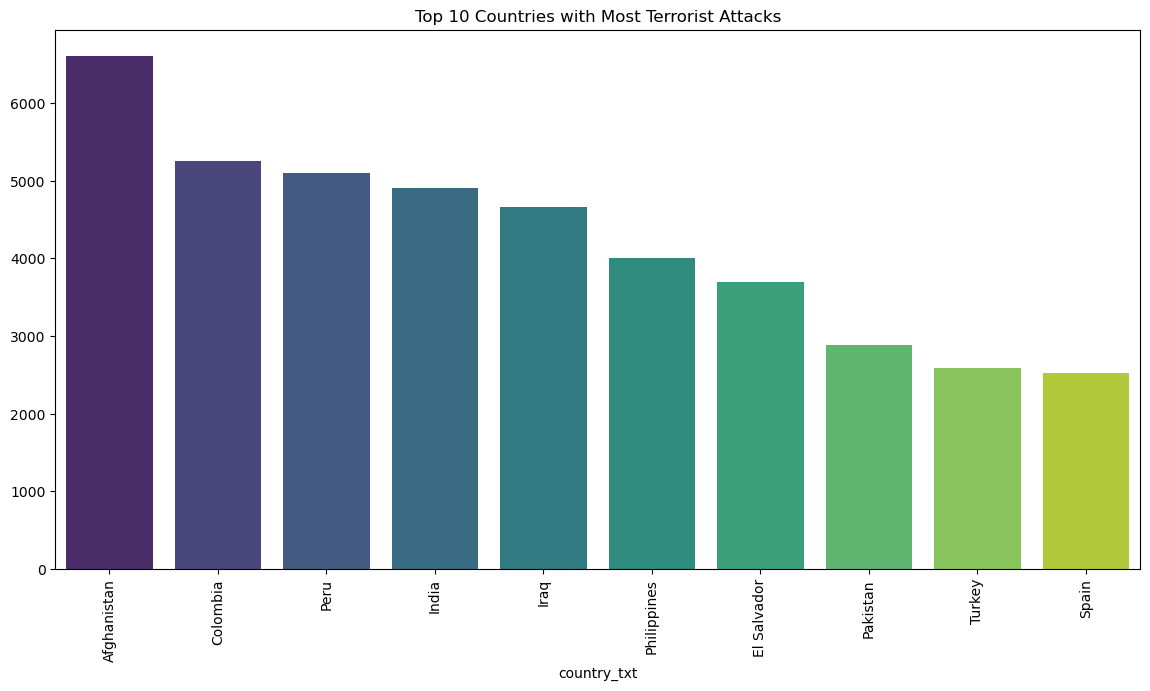

In [82]:
top_countries = data['country_txt'].value_counts().head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

In [83]:
reg=data['region_txt'].value_counts()
print (reg)

region_txt
South Asia                     17416
Middle East & North Africa     16196
South America                  12433
Sub-Saharan Africa              8559
Central America & Caribbean     6182
Western Europe                  6119
Southeast Asia                  5095
North America                   1563
Eastern Europe                  1083
East Asia                        250
Central Asia                      85
Australasia & Oceania             73
Name: count, dtype: int64


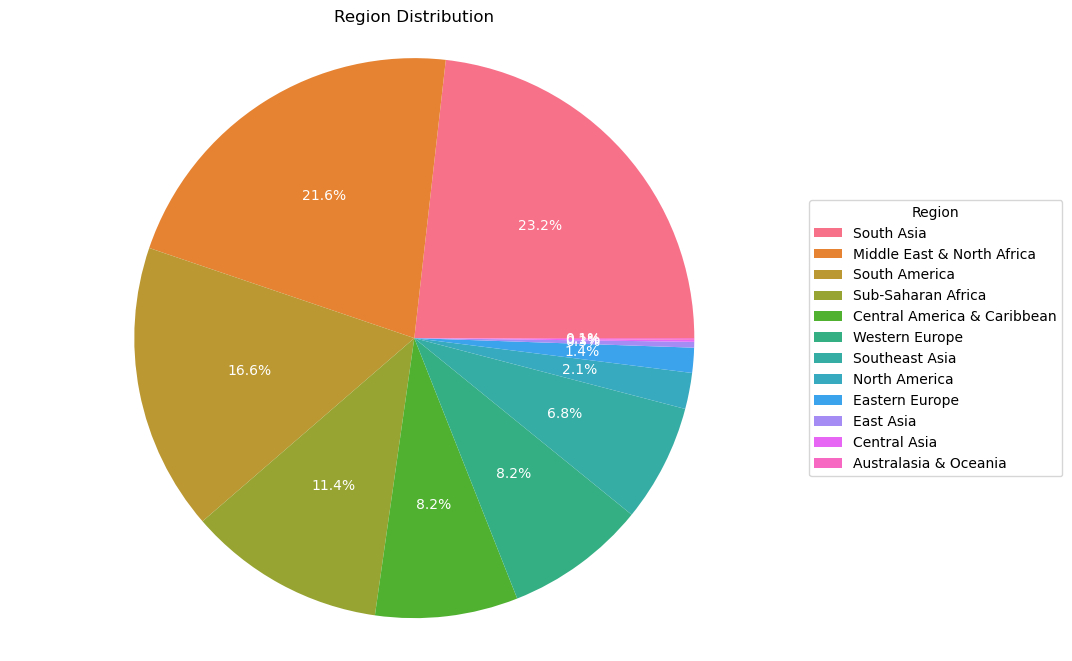

In [84]:
plt.figure(figsize=(10, 8))
wedges,texts,autotexts = plt.pie(reg,labels=reg.index,autopct='%1.1f%%',colors=sns.color_palette("husl", len(reg)),
    textprops=dict(color="w"))
plt.legend(wedges,reg.index,title="Region",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Region Distribution')
plt.axis('equal')
plt.show()

<Axes: xlabel='vicinity', ylabel='count'>

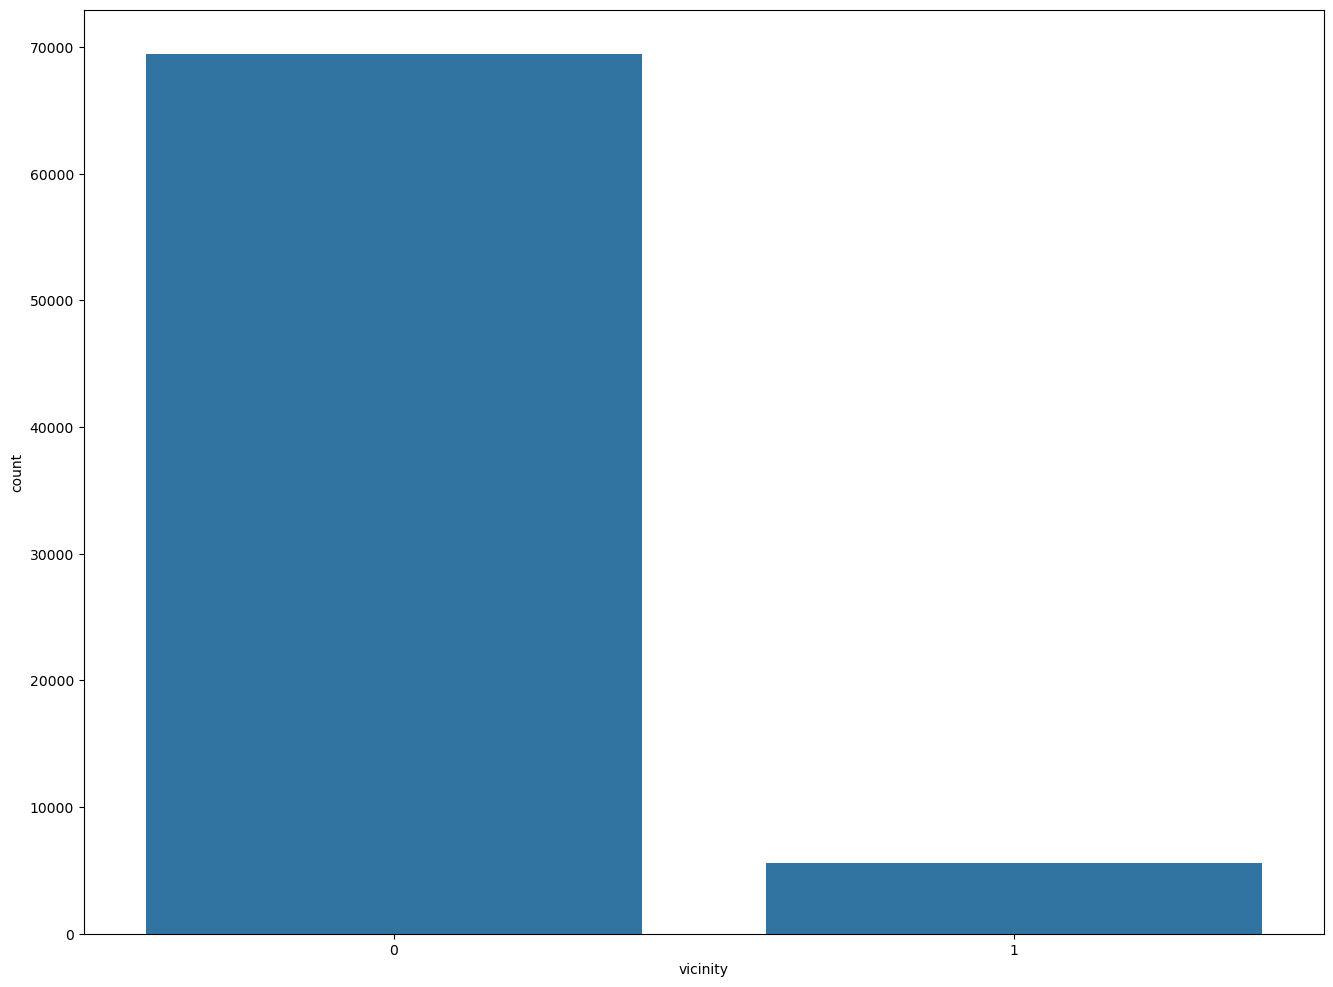

In [85]:
sns.countplot(x='vicinity',data=data)

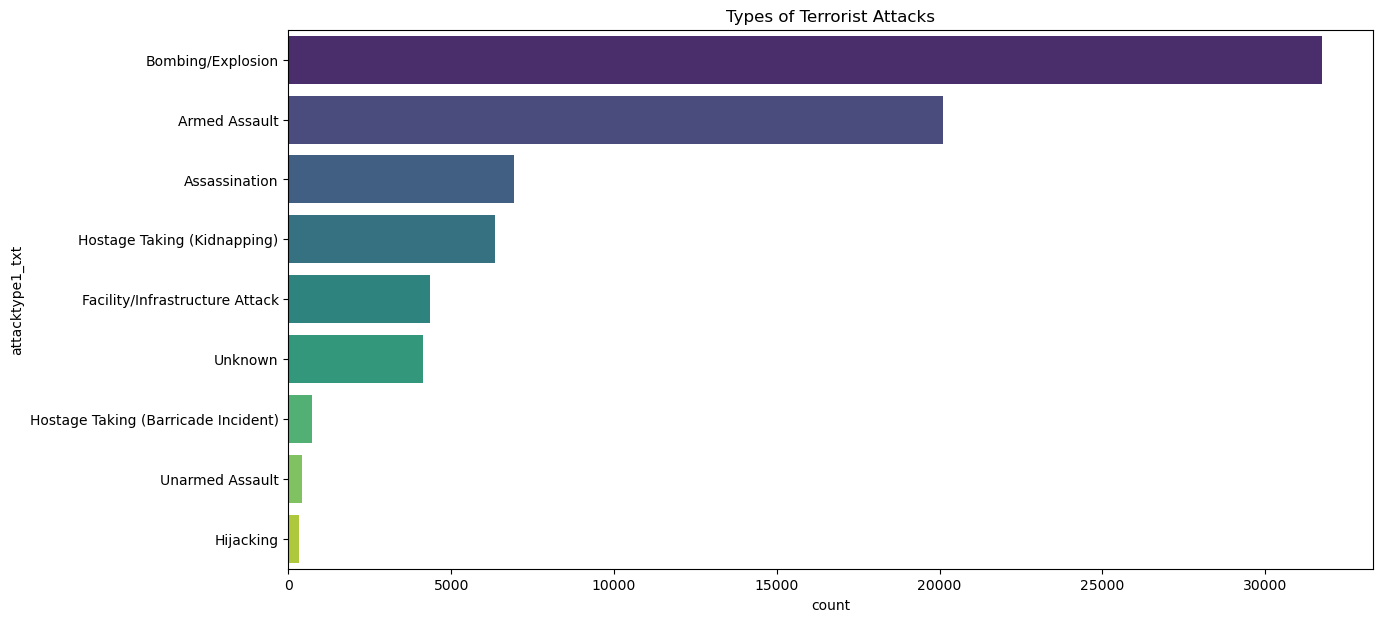

In [86]:
plt.figure(figsize=(14, 7))
sns.countplot(y='attacktype1_txt', data=data, order=data['attacktype1_txt'].value_counts().index, palette='viridis')
plt.title('Types of Terrorist Attacks')
plt.show()

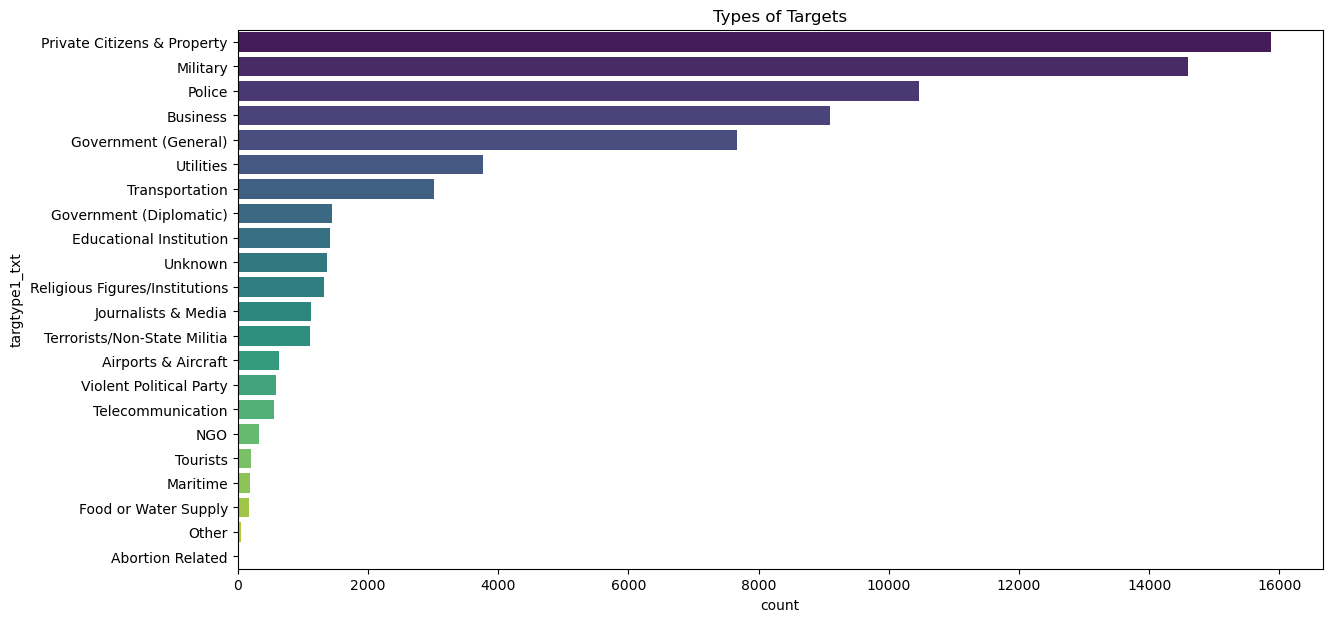

In [87]:
plt.figure(figsize=(14, 7))
sns.countplot(y='targtype1_txt', data=data, order=data['targtype1_txt'].value_counts().index, palette='viridis')
plt.title('Types of Targets')
plt.show()

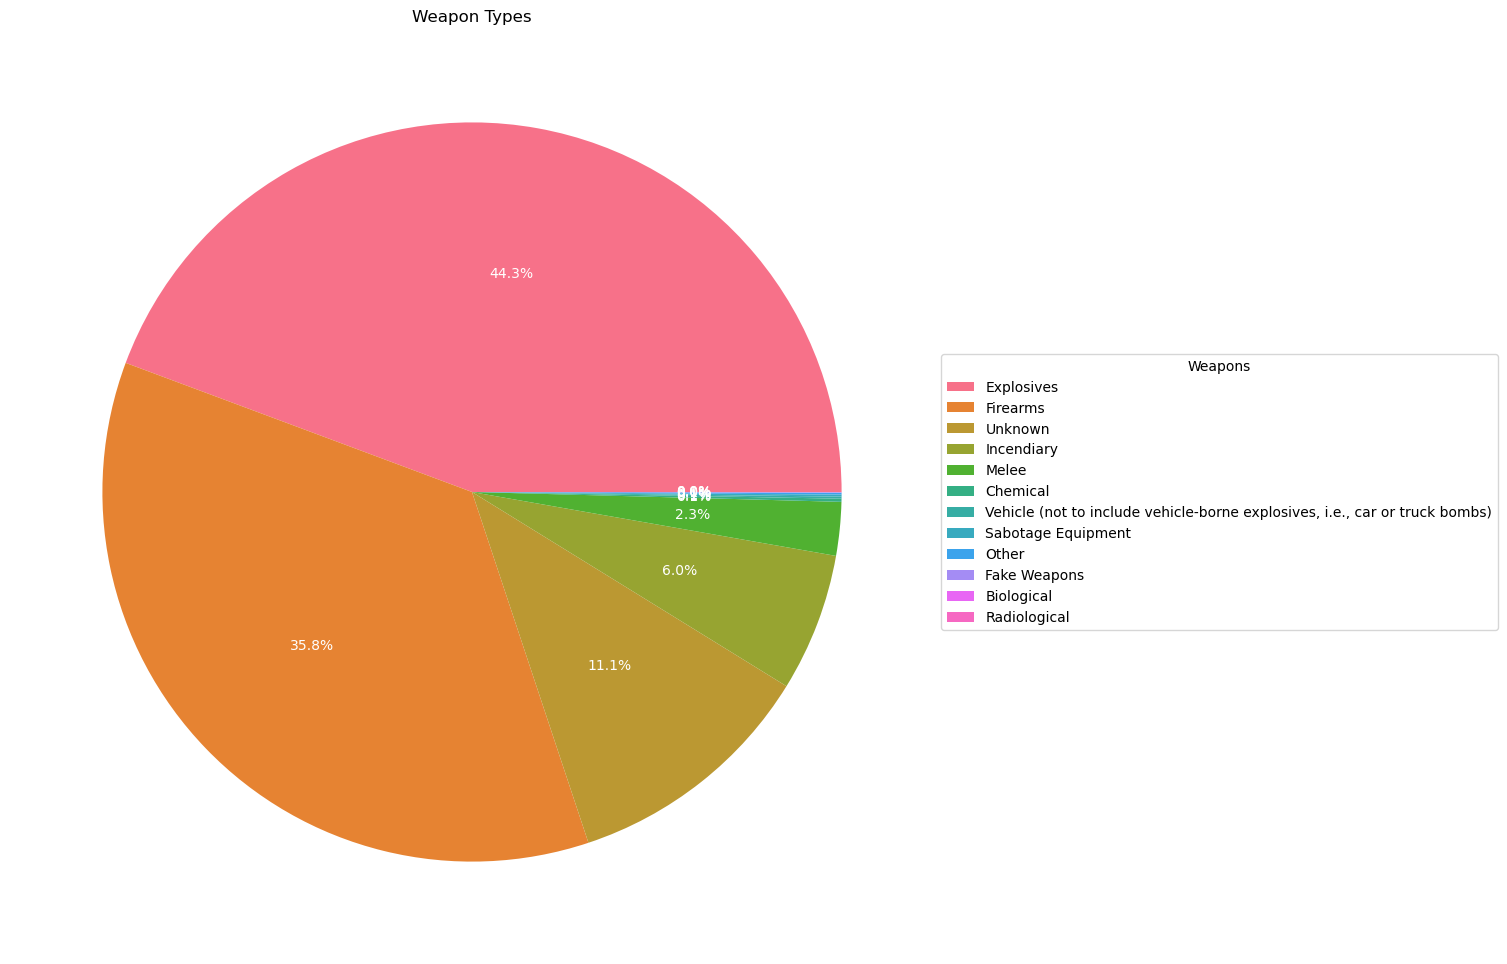

In [88]:
weap=data['weaptype1_txt'].value_counts()
wedges,x,c=plt.pie(weap,labels=weap.index,autopct='%1.1f%%',colors=sns.color_palette('husl',len(weap))
                  ,textprops=dict(color='w'))
plt.legend(wedges,weap.index,title='Weapons',loc="center left",bbox_to_anchor=(1,0,0.5,1))
plt.title("Weapon Types")
plt.show()

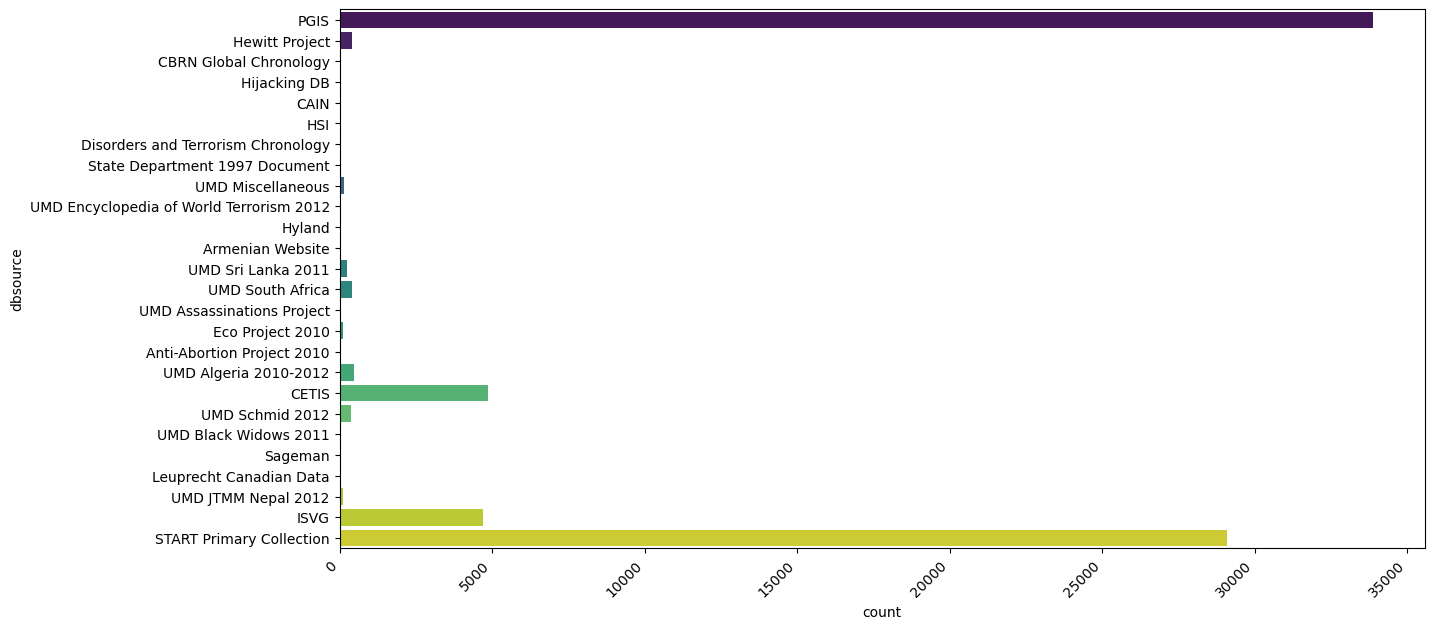

In [89]:
plt.figure(figsize=(14, 7))
sns.countplot(y='dbsource', data=data, palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.show()

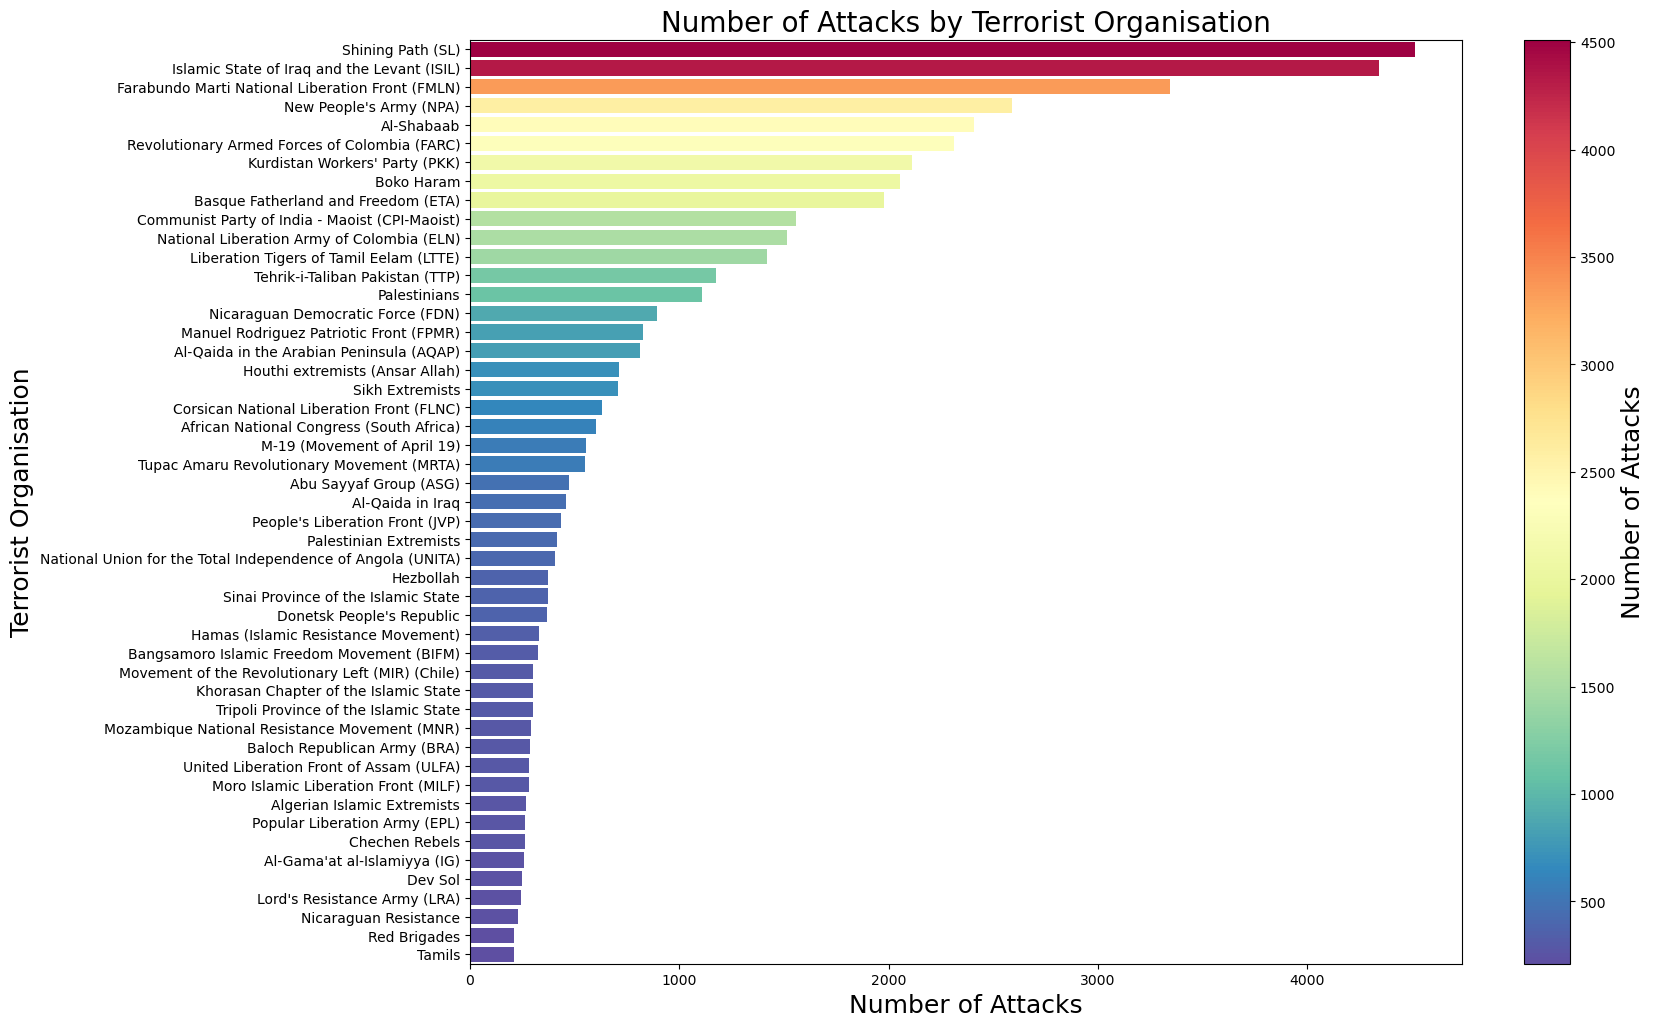

In [90]:
plt.rcParams['figure.figsize'] = (16, 12)

ax = sns.countplot(y='gname', data=data, order=data['gname'].value_counts().index[1:50])

ax.set_xlabel('Number of Attacks', fontsize=18)
ax.set_ylabel('Terrorist Organisation', fontsize=18)

counts = data['gname'].value_counts().iloc[1:50]

norm = plt.Normalize(counts.min(), counts.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Spectral.reversed(), norm=norm)
sm.set_array([])

for i, patch in enumerate(ax.patches):
    height = patch.get_width()
    patch.set_facecolor(sm.to_rgba(height))

cbar = ax.figure.colorbar(sm)
cbar.set_label('Number of Attacks', fontsize=18)

ax.set_title('Number of Attacks by Terrorist Organisation', fontsize=20)

plt.show()